## **Predict the likelihood of accidents on different types of roads.**

### **1. Data Collection**

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_csv("/content/drive/MyDrive/Datasets/Road Accident Data/train.csv")
train_df.head()


,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


### **2. Exploratory Data Analysis and Data Preprocessing**

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

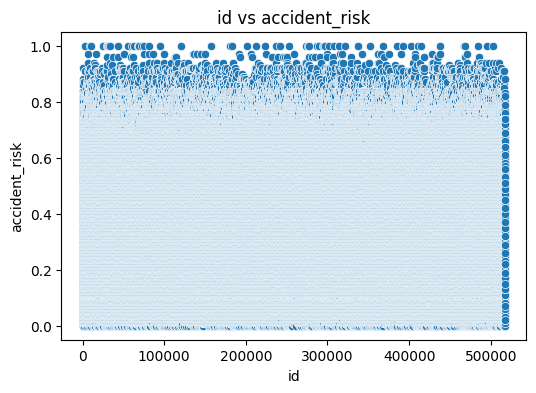

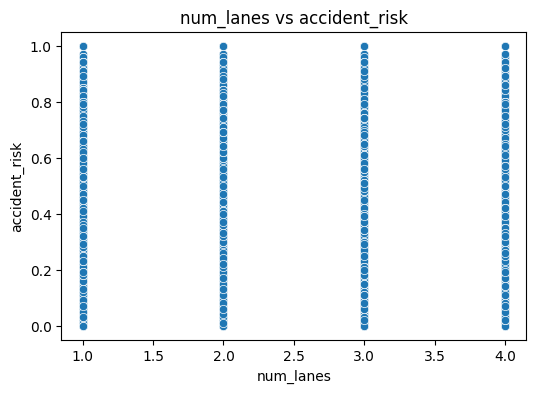

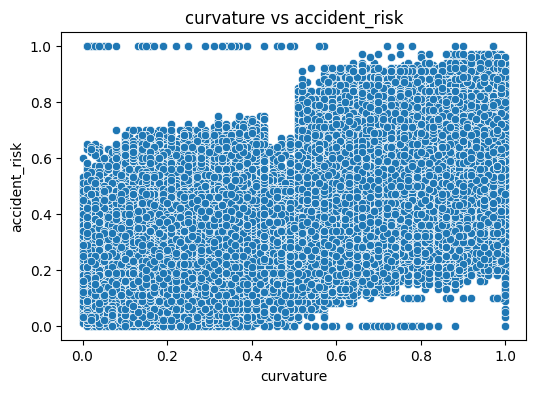

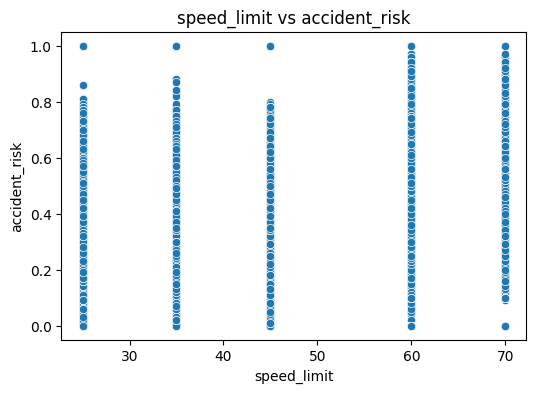

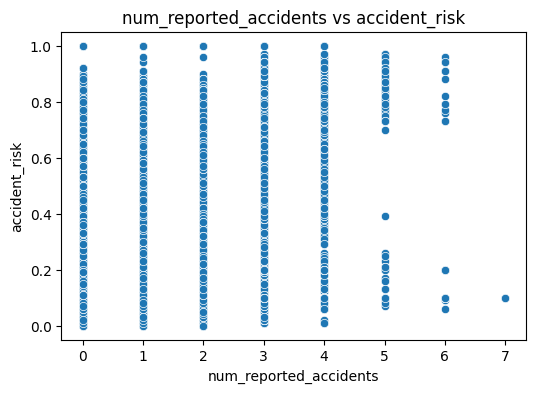

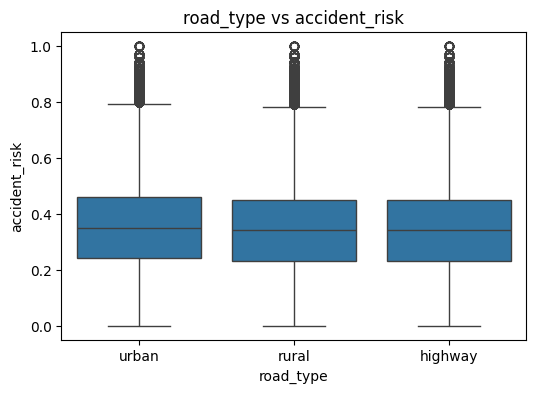

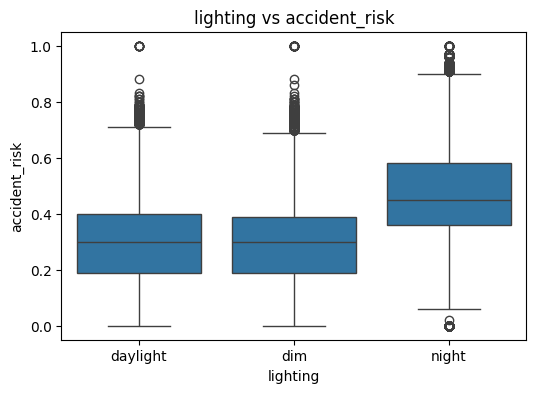

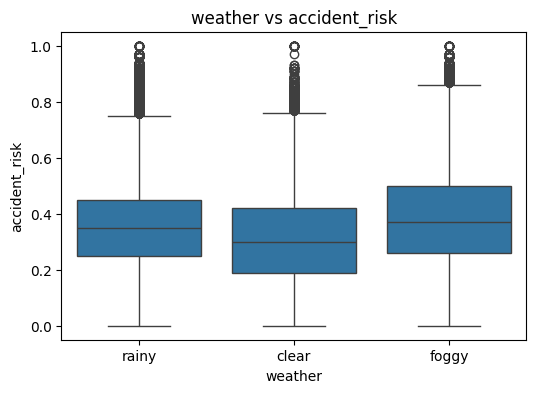

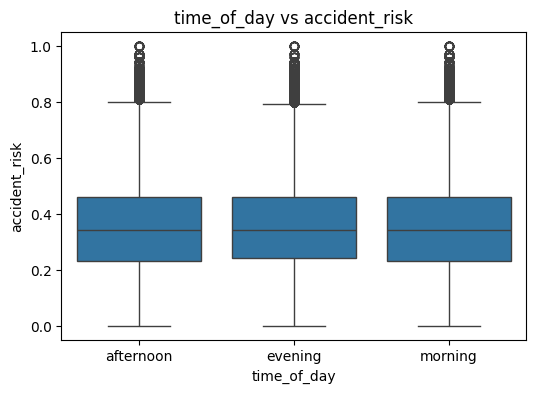

In [5]:
# Numeric vs target
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train_df.select_dtypes(include=['object']).columns
for col in numeric_cols:
    if col != 'accident_risk':
        plt.figure(figsize=(6,4))
        sns.scatterplot(data=train_df, x=col, y='accident_risk')
        plt.title(f'{col} vs accident_risk')
        plt.show()

# Categorical vs target
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=train_df, x=col, y='accident_risk')
    plt.title(f'{col} vs accident_risk')
    plt.show()


In [6]:
#Convert bool to int , perform one hot encoding on object dtypes
import pandas as pd

def convert_bool_object(train_df):
  for col in train_df.columns:
    if train_df[col].dtype == 'bool':
      train_df[col] = train_df[col].astype(int)
    elif train_df[col].dtype == 'object':
      train_df = pd.get_dummies(train_df, columns=[col], drop_first=False)
  return train_df

In [7]:
train_df = convert_bool_object(train_df)
train_df.corr()['accident_risk'].sort_values(ascending=False)

,accident_risk
accident_risk,1.000000
curvature,0.543946
lighting_night,0.465798
speed_limit,0.430898
num_reported_accidents,0.213891
weather_foggy,0.149758
holiday,0.051129
weather_rainy,0.036137
public_road,0.031032
road_type_urban,0.021463


In [8]:
train_df=convert_bool_object(train_df)
train_df

,id,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,accident_risk,...,road_type_urban,lighting_daylight,lighting_dim,lighting_night,weather_clear,weather_foggy,weather_rainy,time_of_day_afternoon,time_of_day_evening,time_of_day_morning
0,0,2,0.06,35,0,1,0,1,1,0.13,...,1,1,0,0,0,0,1,1,0,0
1,1,4,0.99,35,1,0,1,1,0,0.35,...,1,1,0,0,1,0,0,0,1,0
2,2,4,0.63,70,0,1,1,0,2,0.30,...,0,0,1,0,1,0,0,0,0,1
3,3,4,0.07,35,1,1,0,0,1,0.21,...,0,0,1,0,0,0,1,0,0,1
4,4,1,0.58,60,0,0,1,0,1,0.56,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,517749,4,0.10,70,1,1,0,0,2,0.32,...,0,1,0,0,0,1,0,1,0,0
517750,517750,4,0.47,35,1,1,0,0,1,0.26,...,0,1,0,0,0,0,1,0,0,1
517751,517751,4,0.62,25,0,0,0,1,0,0.19,...,1,1,0,0,0,1,0,1,0,0
517752,517752,3,0.63,25,1,0,1,1,3,0.51,...,0,0,0,1,1,0,0,1,0,0


### **3. Identify X, y and Split data into train and test data**

In [9]:
X=train_df.drop('accident_risk',axis=1)
y=train_df['accident_risk']

In [10]:
#Split into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### **4. Model Development, Training and Evaluation**

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,root_mean_squared_error

randomforest=RandomForestRegressor()
randomforest.fit(X_train,y_train)
y_pred=randomforest.predict(X_test)
root_mean_squared_error(y_test,y_pred)

0.057947827082107

### **5. Predict the likelihood of accidents in test data using the trained model**

In [35]:
test_df=pd.read_csv("/content/drive/MyDrive/Datasets/Road Accident Data/test.csv")
test_df.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
1,517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
2,517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
3,517757,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
4,517758,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3


In [36]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172585 entries, 0 to 172584
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      172585 non-null  int64  
 1   road_type               172585 non-null  object 
 2   num_lanes               172585 non-null  int64  
 3   curvature               172585 non-null  float64
 4   speed_limit             172585 non-null  int64  
 5   lighting                172585 non-null  object 
 6   weather                 172585 non-null  object 
 7   road_signs_present      172585 non-null  bool   
 8   public_road             172585 non-null  bool   
 9   time_of_day             172585 non-null  object 
 10  holiday                 172585 non-null  bool   
 11  school_season           172585 non-null  bool   
 12  num_reported_accidents  172585 non-null  int64  
dtypes: bool(4), float64(1), int64(4), object(4)
memory usage: 12.5+ MB


In [39]:
test_processed_df=convert_bool_object(test_df)
test_processed_df.head()

,id,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,road_type_highway,...,road_type_urban,lighting_daylight,lighting_dim,lighting_night,weather_clear,weather_foggy,weather_rainy,time_of_day_afternoon,time_of_day_evening,time_of_day_morning
0,517754,2,0.34,45,1,1,1,1,1,1,...,0,0,0,1,1,0,0,1,0,0
1,517755,3,0.04,45,1,0,1,0,0,0,...,1,0,1,0,0,1,0,1,0,0
2,517756,2,0.59,35,1,0,1,1,1,0,...,1,0,1,0,1,0,0,1,0,0
3,517757,4,0.95,35,0,0,0,0,2,0,...,0,1,0,0,0,0,1,1,0,0
4,517758,2,0.86,35,1,0,0,1,3,1,...,0,1,0,0,1,0,0,0,1,0


In [40]:
test_processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172585 entries, 0 to 172584
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      172585 non-null  int64  
 1   num_lanes               172585 non-null  int64  
 2   curvature               172585 non-null  float64
 3   speed_limit             172585 non-null  int64  
 4   road_signs_present      172585 non-null  int64  
 5   public_road             172585 non-null  int64  
 6   holiday                 172585 non-null  int64  
 7   school_season           172585 non-null  int64  
 8   num_reported_accidents  172585 non-null  int64  
 9   road_type_highway       172585 non-null  int64  
 10  road_type_rural         172585 non-null  int64  
 11  road_type_urban         172585 non-null  int64  
 12  lighting_daylight       172585 non-null  int64  
 13  lighting_dim            172585 non-null  int64  
 14  lighting_night      

In [41]:
probs=randomforest.predict(test_processed_df)
# Add predictions to test_df
test_df['accident_risk'] = probs
test_df[['id','accident_risk']].head()

,id,accident_risk
0,517754,0.5878
1,517755,0.3979
2,517756,0.3779
3,517757,0.6286
4,517758,0.3820


In [43]:
test_df[['id','accident_risk']].to_csv('/content/drive/MyDrive/Datasets/Road Accident Data/test_predictions.csv',index=False)